In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k = 1.38e-23      # J / K
T = 295.          # K
kT = k*T          # J

In [ ]:
hbar = 1.055e-34  # J s
m = 6.64e-27      # kg
L = 2.0e-10       # m

In [ ]:
N = 500                         # number of atoms
microstate = np.ones([N,3],int) # initial microstate (nx,ny,xz)

In [ ]:
Ei = []                               # energy versus step index
E = 3.*N*np.pi**2*hbar**2/(2.*m*L**2) # initial quantum state energy
Ei.append(E)

In [ ]:
steps = 200000
for k in range(steps):

    i = np.random.randint(0,N) # choose particle
    j = np.random.randint(0,3) # choose nx, ny, nz

    if np.random.random() < 0.5: # choice n -> n+/-1
        dn = 1
        dE = (+2*microstate[i,j]+1)*np.pi**2*hbar**2/(2.*m*L**2) # incr. energy for n->n+1
    else:
        dn = -1
        dE = (-2*microstate[i,j]+1)*np.pi**2*hbar**2/(2.*m*L**2) # decr. energy for n->n-1

    if microstate[i,j] > 1or dn == 1: # don't allow n->n-1 if n = 1
        if np.random.random() < np.exp(-dE/kT): # P=1 if dE negative,P<1 if dE positive

            microstate[i,j] += dn # if move accepted update microstate
            E += dE             # if move accepted update energy
    Ei.append(E)

Text(0, 0.5, 'energy [J]')

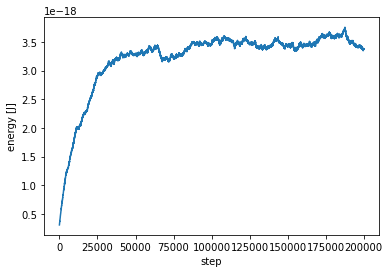

In [ ]:
# plot internal energy versus microstate step
plt.plot(Ei)
plt.xlabel("step")
plt.ylabel("energy [J]")

In [ ]:
# print energy by N * kT / 2
print(3*N*kT/2.)

3.0532500000000003e-18


In [ ]:
print(microstate)
plt.plot(microstate)

In [ ]:
plt.hist(microstate, bins=20, range=(1,20))
plt.xlabel("quantum number, n")
plt.ylabel("occupancy")